## Observations and Insights 

**Obervation 1**<br>
In general, we found the weight of mice is positively correlated with the size of tumor with a correlation coefficient of **0.84**. <br>
<br>
**Obervation 2**<br>
The size of tumor did show a decreasing trend throughout time for the mice that received drug Capomulin. <br>
<br>
**Obervation 3**<br>
Throughout the experiment, the drug of interest, Capomulin, has a similiar distribution in the size of tumor as another drug Ramicane. In addition, the data statistics tend to be smaller than other two drugs Infubinol and Ceftamin.  
<br>


In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_data = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'outer')

In [18]:
# Checking the number of mice in the DataFrame.
num_mice = len(comb_data['Mouse ID'].unique())
print("Number of mice in the DataFrame: ", num_mice)

Number of mice in the DataFrame:  249


In [19]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
list_of_dups = comb_data[comb_data.duplicated(['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
list_of_dups

array(['g989'], dtype=object)

In [20]:
# Optional: Get all the data for the duplicate mouse ID. 
dups = comb_data[comb_data['Mouse ID'].isin(list_of_dups)].copy()
dups

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [21]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
tidy_data = comb_data[~comb_data['Mouse ID'].isin(list_of_dups)].copy()
print('Original dataset has '  + str(comb_data.shape[0]) + ' entries.')
print('Duplicate dataset has ' + str(dups.shape[0])      + ' entries.')
print('Tidy dataset has '      + str(tidy_data.shape[0]) + ' entries.')

Original dataset has 1893 entries.
Duplicate dataset has 13 entries.
Tidy dataset has 1880 entries.


In [22]:
# Checking the number of mice in the clean DataFrame.
num_mice1 = len(tidy_data['Mouse ID'].unique())
print("Number of mice in the clean DataFrame: ",  num_mice1)

Number of mice in the clean DataFrame:  248


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

grouped_data = tidy_data.groupby('Drug Regimen')

## number of observation
num_obs = grouped_data['Tumor Volume (mm3)'].count()

## mean
mean_data = grouped_data['Tumor Volume (mm3)'].mean()

## median
median_data = grouped_data['Tumor Volume (mm3)'].median()

## variance
variance_data = grouped_data['Tumor Volume (mm3)'].var()

## standard deviation
stdev_data = grouped_data['Tumor Volume (mm3)'].std()

## Standard error of mean
'''
standard error of the mean (SEM) measures how far the sample mean of the data is likely to be from the true population mean. 
The SEM is always smaller than the standard deviation.
'''
sem_data = grouped_data['Tumor Volume (mm3)'].sem()

In [24]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = {
    'Number of Observation'  : num_obs,
    'Mean'                   : mean_data,
    'Median'                 : median_data,
    'Variance'               : variance_data, 
    'Standard Deviation'     : stdev_data,
    'Standard error of mean' : sem_data
}

summary_stats = pd.DataFrame(summary_stats)

summary_stats

,Number of Observation,Mean,Median,Variance,Standard Deviation,Standard error of mean
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,148,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

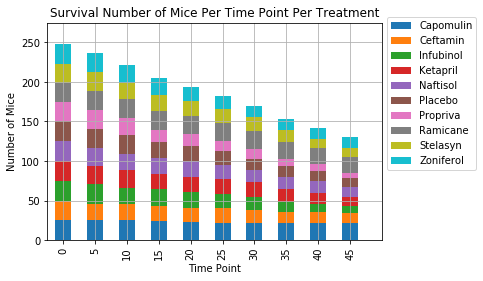

In [25]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# '''cool method http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot'''
# tidy_data.groupby(['Timepoint','Drug Regimen']).size().unstack().plot(kind='bar',stacked=True)
# plt.show()

## Group by Timepoint and Drug Regimen
grouped_tidy = tidy_data.groupby(['Timepoint', 'Drug Regimen'])

## Count number of mice
num_mice = grouped_tidy['Mouse ID'].count()
num_mice = pd.DataFrame(num_mice)
num_mice = num_mice.rename(columns = {'Mouse ID' : 'Count'})

# Plot
num_mice.unstack().plot(kind = 'bar', y = 'Count', stacked=True)

plt.title('Survival Number of Mice Per Time Point Per Treatment')
plt.xlabel('Time Point')
plt.ylabel('Number of Mice')
plt.legend(bbox_to_anchor=(1, 1.05))
plt.xlim(-0.5, len(tidy_data['Timepoint'].unique()))
plt.ylim(0, 275)
plt.grid()
plt.show()

Capomulin
Ceftamin
Infubinol
Ketapril
Naftisol
Placebo
Propriva
Ramicane
Stelasyn
Zoniferol


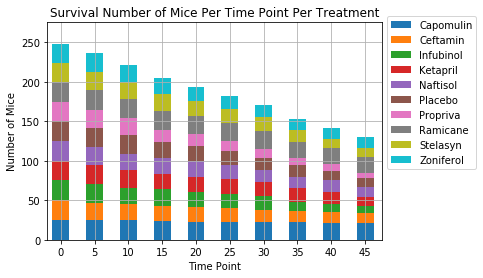

In [26]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = tidy_data['Timepoint'].unique()

plt_num_mice = num_mice.reset_index()

treatments = plt_num_mice['Drug Regimen'][0:10].unique()

bottom = [0, 0, 0, 0, 0,
          0, 0, 0, 0, 0]

for tm in treatments:

    print(tm)
    
    y_axis = plt_num_mice.loc[plt_num_mice['Drug Regimen'] == tm, 'Count'].tolist() 
    plt.bar(x_axis, y_axis, label = tm, width=2.5, bottom = bottom)
    # Add the data to bottom, so bar chart can stack 
    bottom = np.add(bottom, y_axis)
    
plt.title('Survival Number of Mice Per Time Point Per Treatment')
plt.xlabel('Time Point')
plt.ylabel('Number of Mice')
plt.legend(bbox_to_anchor=(1, 1.05))
plt.xlim(-2, 47.5)
plt.ylim(0, 275)
plt.xticks(x_axis, x_axis)
plt.grid()
plt.show()


## Pie Plots

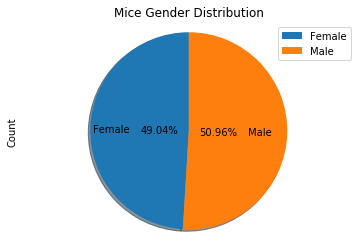

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
grouped_gender = tidy_data.groupby('Sex')
gender_dist = grouped_gender['Mouse ID'].count()
gender_df = pd.DataFrame(gender_dist)
gender_df = gender_df.rename(columns = {'Mouse ID' : 'Count'})

gender_df.plot(kind = 'pie', y = 'Count', autopct = "%1.2f%%", shadow = True, startangle = 90, pctdistance = 0.3, labeldistance = 0.6)
plt.title('Mice Gender Distribution')
plt.legend(loc = 'upper right')
plt.axis('equal')
plt.show()

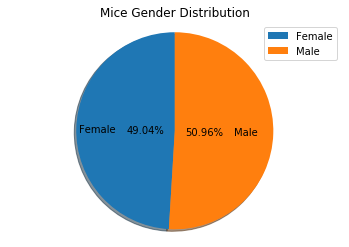

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

grouped_gender = tidy_data.groupby('Sex')
gender_dist = grouped_gender['Mouse ID'].count()

labels = gender_dist.keys().tolist()
sizes = gender_dist.tolist()
explode = (0, 0)

plt.pie(sizes, explode = explode, labels = labels, autopct = "%1.2f%%", shadow = True, startangle = 90, pctdistance = 0.3, labeldistance = 0.6)
plt.title('Mice Gender Distribution')
plt.legend(loc = 'upper right')
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. 

promising_tm = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter dataset to only promising_tm
filtered_data = tidy_data.loc[tidy_data['Drug Regimen'].isin(promising_tm)].copy()

# Sort filtered data by Mouse ID and then Timepoint
filtered_data = filtered_data.sort_values(['Mouse ID', 'Timepoint'])

# Finding the last tumor volume using drop duplicates
filtered_data = filtered_data.drop_duplicates(subset = 'Mouse ID', keep = 'last')

# Judgement call: Droping mice that only has Timepoint = 0 observation. I beleive these observations were initial tumor volume instead of final.
filtered_data = filtered_data.loc[filtered_data['Timepoint'] != 0].copy()

# Sort by Treatments
filtered_data = filtered_data.sort_values('Drug Regimen')

filtered_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1455,r157,Capomulin,Male,22,25,15,46.539206,0
440,i557,Capomulin,Female,1,24,45,47.685963,1
370,s710,Capomulin,Female,1,23,45,40.728578,1
164,t565,Capomulin,Female,20,17,45,34.455298,0
317,j246,Capomulin,Female,21,21,35,38.753265,1


In [30]:
# Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

promising_tm_dict = {}

for tm in promising_tm:
    quartiles = tm + '_quartiles'
    
    # Create quartile
    exec(f"{quartiles} = filtered_data.loc[filtered_data['Drug Regimen'] == '{tm}', 'Tumor Volume (mm3)'].quantile([.25,.5,.75])")
    # 1st quartile
    exec(f"{tm}_lowerq = {tm}_quartiles[0.25]")
    # 3rd quartile
    exec(f"{tm}_upperq = {tm}_quartiles[0.75]")
    # IQR
    exec(f"{tm}_irq    = {tm}_upperq - {tm}_lowerq")
    # Lower bound
    exec(f"{tm}_lower_bound = {tm}_lowerq - (1.5 * {tm}_irq)")  
    # Upper bound
    exec(f"{tm}_upper_bound = {tm}_upperq + (1.5 * {tm}_irq)")
    
    # put calculation into a dictionary
    exec(f"promising_tm_dict['{tm}'] = [{tm}_lowerq, {tm}_upperq, {tm}_irq, {tm}_lower_bound, {tm}_upper_bound]")
    
    # Filter data
    exec(f"{tm}_data = filtered_data.loc[(filtered_data['Drug Regimen'] == '{tm}')].copy()")   
    
    # Find outlier 
    exec(f"{tm}_outlier= {tm}_data.loc[({tm}_data['Tumor Volume (mm3)']  < {tm}_lower_bound) | ({tm}_data['Tumor Volume (mm3)'] > {tm}_upper_bound)]")


# Print quartiles, IQR, lower and upper bounds data
quartiles_df = pd.DataFrame(promising_tm_dict)
quartiles_df = quartiles_df.transpose()
quartiles_df = quartiles_df.rename(columns = {0 : 'First Q'    , 
                                              1 : 'Third Q'    ,
                                              2 : 'IQR'        ,
                                              3 : 'Lower Bound',
                                              4 : 'Upper Bound',
                                             })

print(quartiles_df)

# Print all outliers data    
all_outliers = Capomulin_outlier.append(Ramicane_outlier).append(Infubinol_outlier).append(Ceftamin_outlier)

print(all_outliers)

             First Q    Third Q        IQR  Lower Bound  Upper Bound
Capomulin  32.377357  40.159220   7.781863    20.704562    51.832015
Ramicane   31.560470  40.659006   9.098537    17.912664    54.306811
Infubinol  54.048608  65.525743  11.477135    36.832905    82.741446
Ceftamin   56.057749  64.634949   8.577200    43.191949    77.500749
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
669     c326    Infubinol  Female          18          25          5   

     Tumor Volume (mm3)  Metastatic Sites  
669           36.321346                 0  


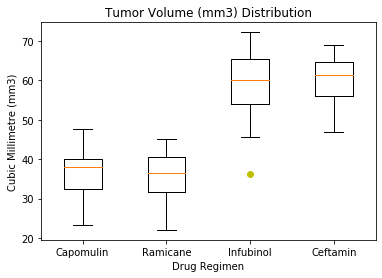

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data_to_plot = [Capomulin_data['Tumor Volume (mm3)'],
                Ramicane_data['Tumor Volume (mm3)' ],
                Infubinol_data['Tumor Volume (mm3)'],
                Ceftamin_data['Tumor Volume (mm3)' ],
               ]

plt.boxplot(data_to_plot, sym='y')
plt.xticks([1, 2, 3, 4], promising_tm)
plt.title('Tumor Volume (mm3) Distribution')
plt.xlabel('Drug Regimen')
plt.ylabel('Cubic Millimetre (mm3)')
plt.show()

## Line and Scatter Plots

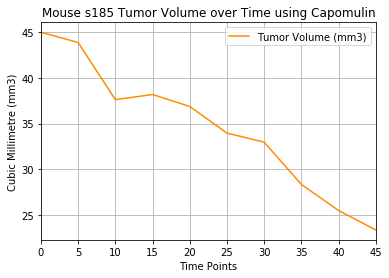

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin_time = tidy_data.loc[tidy_data['Drug Regimen'] == 'Capomulin'].copy()

# Isolate One Mouse
one_Capomulin_mouse = Capomulin_time.loc[Capomulin_time['Mouse ID'] == 's185'].copy()

one_Capomulin_mouse.plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)', color = 'darkorange')

plt.title('Mouse s185 Tumor Volume over Time using Capomulin')
plt.xlabel('Time Points')
plt.ylabel('Cubic Millimetre (mm3)')
plt.grid()
plt.show()

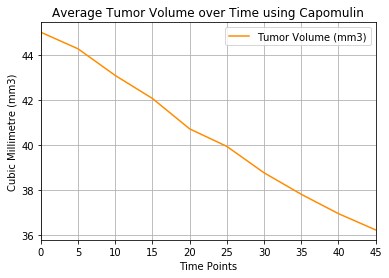

In [33]:
# Just Curious Section
# Generate a line plot of time point versus tumor volume for all mice treated with Capomulin

Capomulin_time = tidy_data.loc[tidy_data['Drug Regimen'] == 'Capomulin'].copy()

grouped_Capomulin = Capomulin_time.groupby('Timepoint').mean()

grouped_Capomulin = grouped_Capomulin.reset_index(drop = False)

grouped_Capomulin.plot(kind = 'line', x = 'Timepoint', y = 'Tumor Volume (mm3)', color = 'darkorange')

plt.title('Average Tumor Volume over Time using Capomulin')
plt.xlabel('Time Points')
plt.ylabel('Cubic Millimetre (mm3)')
plt.grid()
plt.show()

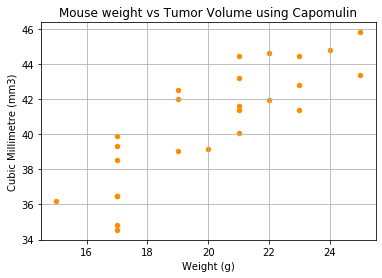

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_mice_wgt = tidy_data.loc[tidy_data['Drug Regimen'] == 'Capomulin'].copy()

grouped_Capomulin_mice = Capomulin_mice_wgt.groupby('Mouse ID').mean()

grouped_Capomulin_mice.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)', color = 'darkorange')

plt.title('Mouse weight vs Tumor Volume using Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Cubic Millimetre (mm3)')
plt.grid()
plt.show()

## Correlation and Regression

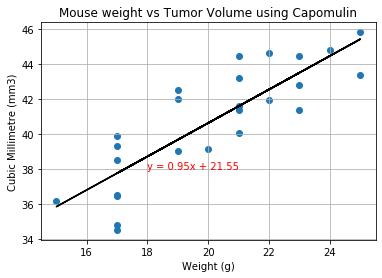

Correlation Coefficient: 0.8419363424694718
Linear Regression Model: y = 0.95x + 21.55


In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = grouped_Capomulin_mice['Weight (g)']
y_values = grouped_Capomulin_mice['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = (x_values * slope) + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(18,38),fontsize=10,color="red")
plt.title('Mouse weight vs Tumor Volume using Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Cubic Millimetre (mm3)')
plt.grid()
plt.show()

print('Correlation Coefficient: ' + str(rvalue))
print('Linear Regression Model: ' + line_eq)

In [36]:
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Pearson r
pearsonr = stats.pearsonr(x_values,y_values)

print(rvalue, pearsonr[0])

0.8419363424694718 0.8419363424694717
